In [1]:
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ssl

plt.style.use('ggplot')

ssl._create_default_https_context = ssl._create_stdlib_context

In [2]:
CSV_PATHS = 'https://scandeval.com/{language}-nlg.csv'
CSV_PATHS

'https://scandeval.com/{language}-nlg.csv'

In [30]:
LANGUAGES = ['da', 'no', 'sv', 'de', 'nl', 'en', 'is']

In [31]:
models = {
    "gpt-4-0613": "gpt-4",
    "gpt-4-1106-preview": "gpt-4-turbo",
    "gpt-4o-2024-05-13": "gpt-4o",
    "gpt-4o-mini-2024-07-18": "gpt-4o-mini",
}

all_models = list(models.keys())
all_new_models = list(models.values())

results_dict = dict()
for language in LANGUAGES:
    df = (
        pd
        .read_csv(CSV_PATHS.format(language="germanic"))
        .query('merge == False')
        .set_index('model_id')
    )
    df.index = df.index.map(lambda x: re.sub('\(.*\)', '', x).strip())
    scores = df[f'{language}_rank']
            
    scores = scores.loc[all_models]
    results_dict[language] = scores.tolist()

df = pd.DataFrame(results_dict, index=all_new_models)
df

,da,no,sv,de,nl,en,is
gpt-4,1.14,1.14,1.13,1.17,1.18,1.22,1.42
gpt-4-turbo,1.19,1.26,1.19,1.33,1.49,1.17,1.13
gpt-4o,1.22,1.27,1.19,1.42,1.58,1.38,1.21
gpt-4o-mini,1.92,2.09,1.93,1.78,2.42,1.63,2.44


In [32]:
gpt4_models = {model_id: model_name for model_id, model_name in models.items() if "gpt-4" in model_name}
gpt4_values = df.loc[list(gpt4_models.values())[0]]
gpt4_values

da    1.14
no    1.14
sv    1.13
de    1.17
nl    1.18
en    1.22
is    1.42
Name: gpt-4, dtype: float64

In [33]:
gpt4_df = df.loc[list(gpt4_models.values())]
gpt4_df = gpt4_df - gpt4_values
gpt4_df["germanic"] = gpt4_df.mean(axis=1)
gpt4_df

,da,no,sv,de,nl,en,is,germanic
gpt-4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
gpt-4-turbo,0.05,0.12,0.06,0.16,0.31,-0.05,-0.29,0.051429
gpt-4o,0.08,0.13,0.06,0.25,0.40,0.16,-0.21,0.124286
gpt-4o-mini,0.78,0.95,0.80,0.61,1.24,0.41,1.02,0.830000


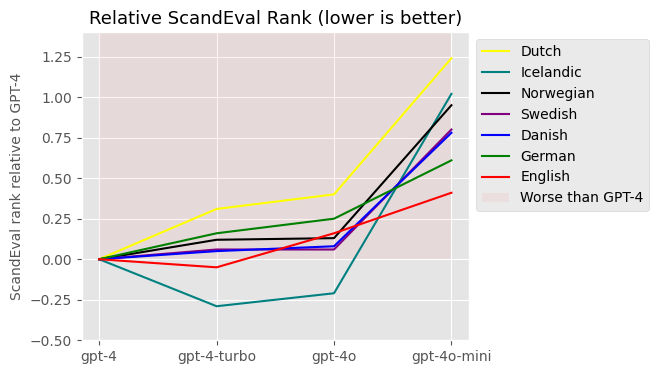

In [39]:
plt.figure(figsize=(5,4))

plt.plot(gpt4_df.nl, label="Dutch", color='yellow')
plt.plot(gpt4_df['is'], label="Icelandic", color='teal')
plt.plot(gpt4_df.no, label="Norwegian", color='black')
plt.plot(gpt4_df.sv, label="Swedish", color='purple')
plt.plot(gpt4_df.da, label="Danish", color='blue')
plt.plot(gpt4_df.de, label="German", color='green')
plt.plot(gpt4_df.en, label="English", color='red')

plt.fill_between(x=gpt4_df.index.tolist(), y1=0.0, y2=1.4, facecolor='red', alpha=0.05, label="Worse than GPT-4")

plt.title("Relative ScandEval Rank (lower is better)", fontsize=13)
plt.ylim(-0.5, 1.4)
plt.ylabel('ScandEval rank relative to GPT-4', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1))

plt.savefig('gpt4-drop.png', bbox_inches="tight", dpi=300)
plt.show()